In [1]:
import numpy as np
import os
import pandas as pd
from io import StringIO
import io
import string
import random
import json
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# from scipy import stats
# from scipy.stats import norm
# from google.colab import drive
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


/Users/priyanshu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Filtering and Merging the TOURNAMENT data sets

In [2]:
tournaments1 = pd.read_csv('ATP data/match_scores_1991-2016_unindexed_csv.csv')

In [3]:
#Choosing only data for year 2016
filtered_t1 = tournaments1[tournaments1['tourney_year_id'].str.startswith('2016-')]

In [4]:
filtered_t1.head()

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
91415,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Finals,1,1,Milos Raonic,r975,milos-raonic,...,1,64 64,2,0,12,8,0,0,2016-339-r975-f324,/en/scores/2016/339/MS001/match-stats
91416,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Semi-Finals,2,1,Roger Federer,f324,roger-federer,...,8,61 64,2,0,12,5,0,0,2016-339-f324-tb69,/en/scores/2016/339/MS002/match-stats
91417,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Semi-Finals,2,2,Milos Raonic,r975,milos-raonic,...,7,76(5) 76(5),2,0,14,12,2,0,2016-339-r975-ta46,/en/scores/2016/339/MS003/match-stats
91418,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Quarter-Finals,3,1,Roger Federer,f324,roger-federer,...,NaN,64 67(4) 64,2,1,18,15,0,1,2016-339-f324-d875,/en/scores/2016/339/MS004/match-stats
91419,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Quarter-Finals,3,2,Bernard Tomic,ta46,bernard-tomic,...,2,63 16 63,2,1,13,12,0,0,2016-339-ta46-n552,/en/scores/2016/339/MS007/match-stats


In [5]:
filtered_t1_rows = filtered_t1.shape[0]

In [6]:
print(f"The filtered ATP1 DataFrame has {filtered_t1_rows} rows.")

The filtered ATP1 DataFrame has 3944 rows.


In [7]:
tournaments2 = pd.read_csv('ATP data/match_scores_2017_unindexed_csv.csv')

In [8]:
t2_rows = tournaments2.shape[0]
print(f"The filtered ATP2 DataFrame has {t2_rows} rows.")

The filtered ATP2 DataFrame has 3830 rows.


In [9]:
#Joining two tables vertically
merged_tournaments = pd.concat([filtered_t1, tournaments2], ignore_index=True)
merged_tournaments.head()

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Finals,1,1,Milos Raonic,r975,milos-raonic,...,1,64 64,2,0,12,8,0,0,2016-339-r975-f324,/en/scores/2016/339/MS001/match-stats
1,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Semi-Finals,2,1,Roger Federer,f324,roger-federer,...,8,61 64,2,0,12,5,0,0,2016-339-f324-tb69,/en/scores/2016/339/MS002/match-stats
2,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Semi-Finals,2,2,Milos Raonic,r975,milos-raonic,...,7,76(5) 76(5),2,0,14,12,2,0,2016-339-r975-ta46,/en/scores/2016/339/MS003/match-stats
3,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Quarter-Finals,3,1,Roger Federer,f324,roger-federer,...,NaN,64 67(4) 64,2,1,18,15,0,1,2016-339-f324-d875,/en/scores/2016/339/MS004/match-stats
4,2016-339,1,brisbane,/en/scores/archive/brisbane/339/2016/results,Quarter-Finals,3,2,Bernard Tomic,ta46,bernard-tomic,...,2,63 16 63,2,1,13,12,0,0,2016-339-ta46-n552,/en/scores/2016/339/MS007/match-stats


In [10]:
#verifying the merge, should be 3830 + 3944
tournament_rows = merged_tournaments.shape[0]
print(f"The filtered merged_ATP DataFrame has {tournament_rows} rows.")

The filtered merged_ATP DataFrame has 7774 rows.


Filtering and Merging the MATCH data sets

In [11]:
matches1 = pd.read_csv('ATP data/match_stats_2017_unindexed_csv.csv') #match_stats_2017_unindexed_csv
matches2 = pd.read_csv('ATP data/match_stats_1991-2016_unindexed_csv.csv')

In [12]:
#Choosing only data for year 2016
filtered_match2 = matches2[matches2['match_id'].str.startswith('2016-')]
filtered_match2.head()

,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
88033,0,2016-339-f324-tb69,/en/scores/2016/339/MS002/match-stats,01:01:00,61.0,6.0,0.0,27.0,49.0,23.0,...,10.0,22.0,1.0,1.0,8.0,9.0,14.0,49.0,41.0,104.0
88034,0,2016-339-r975-f324,/en/scores/2016/339/MS001/match-stats,01:27:00,87.0,6.0,6.0,34.0,60.0,28.0,...,12.0,26.0,0.0,1.0,10.0,10.0,18.0,60.0,57.0,121.0
88035,0,2016-339-f324-d875,/en/scores/2016/339/MS004/match-stats,02:08:00,128.0,7.0,1.0,52.0,83.0,45.0,...,12.0,31.0,1.0,1.0,16.0,16.0,19.0,83.0,86.0,187.0
88036,0,2016-339-r975-ta46,/en/scores/2016/339/MS003/match-stats,01:48:00,108.0,13.0,3.0,49.0,79.0,40.0,...,11.0,30.0,0.0,4.0,12.0,12.0,20.0,79.0,77.0,163.0
88037,0,2016-339-ta46-n552,/en/scores/2016/339/MS007/match-stats,02:00:00,120.0,14.0,1.0,62.0,97.0,45.0,...,22.0,35.0,3.0,11.0,12.0,13.0,39.0,97.0,89.0,181.0


In [13]:
#2016 and onwards rankings
# atp_rankings_for_EE = pd.read_csv('rankings_1973-2017.csv')
# focused_atp_rankings_for_EE = atp_rankings_for_EE[atp_rankings_for_EE['week_year']>2015]
# selected_columns = ['week_year','rank_number','player_id']
# focused_atp_rankings_for_EE = focused_atp_rankings_for_EE[selected_columns]
# focused_atp_rankings_for_EE

In [14]:
match2_rows = filtered_match2.shape[0]
print(f"The filtered merged_ATP DataFrame has {match2_rows} rows.")

The filtered merged_ATP DataFrame has 3923 rows.


In [15]:
match1_rows = matches1.shape[0]
print(f"The filtered ATP2 DataFrame has {match1_rows} rows.")

The filtered ATP2 DataFrame has 3811 rows.


In [16]:
#Joining two tables vertically
merged_matches = pd.concat([filtered_match2, matches1], ignore_index=True)

In [17]:
#verifying the merge, should be 3923 + 3811
matches_rows = merged_matches.shape[0]
print(f"The filtered merged_ATP DataFrame has {matches_rows} rows.")

The filtered merged_ATP DataFrame has 7734 rows.


Merging Player and Ranking Table
(only) adding ranking data to player table

In [18]:
players = pd.read_csv('ATP data/player_overviews_unindexed_csv.csv')

In [19]:
ranking = pd.read_csv('ATP data/rankings_1973-2017.csv', low_memory=False)

#only consider the ranking for players after 2015 (for some variety)
# filtered_ranking = ranking[ranking['week_year']>=2015]

# Calculate the average ranking for each player
# avg_ranking = ranking.groupby('player_id')['rank_number'].mean().reset_index()

# Calculate the highest ranking for each player
peak_ranking = ranking.groupby('player_id')['rank_number'].max().reset_index()


# Merge only the 'rank_number' column back to the player_df
player_updated = pd.merge(players, peak_ranking[['player_id', 'rank_number']], on='player_id', how='left')

# Rename the new column to reflect it's the average ranking
player_updated = player_updated.rename(columns={'rank_number': 'ranking'})

# Display the final DataFrame
player_updated[["first_name","last_name",'player_id', 'ranking']]

# null_count = player_updated['ranking'].isnull().sum()
# null_count # 6208 nulls

# player_updated.columns.values

# player_updated["peak_ranking"].unique()
# len(ranking['player_id'].unique())
# filterered = ranking[ranking['player_id']=="a002"]
# filterered[['player_id', 'rank_number',"week_year"]]
# players[players['player_id']=="a002"]

,first_name,last_name,player_id,ranking
0,Ricardo,Acuna,a002,1264.0
1,Sadiq,Abdullahi,a001,1270.0
2,Nelson,Aerts,a005,1070.0
3,Egan,Adams,a004,1112.0
4,Ronald,Agenor,a006,1571.0
...,...,...,...,...
10907,A.,Zorab,z435,NaN
10908,J.,Zimmermann,z437,NaN
10909,G.,Zinn,z436,NaN
10910,C.,Zenger,z440,NaN


Merging Tournaments and Matches tables with Players table

In [20]:
## Merge 'merged_matches' and 'merged_tournaments' on 'tourney_order'
merged_df = pd.merge(merged_matches, merged_tournaments, on='tourney_order', how='inner')

In [21]:
# Merge 'merged_df' with 'player' on 'winner_player_id' and update column names for winner
merged_df = pd.merge(merged_df, player_updated, left_on='winner_player_id', right_on='player_id', how='left', suffixes=('', '_winner'))
merged_df.columns = [col if col not in player_updated.columns else f"winner_{col}" for col in merged_df.columns]

# Merge 'merged_df' with 'player' on 'loser_player_id' and update column names for loser
merged_df = pd.merge(merged_df, player_updated, left_on='loser_player_id', right_on='player_id', how='left', suffixes=('', '_loser'))
merged_df.columns = [col if col not in player_updated.columns else f"loser_{col}" for col in merged_df.columns]

In [22]:
# Drop duplicate columns (e.g., 'player_id_x', 'player_id_y')
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Display the resulting DataFrame
merged_df.head()

,tourney_order,match_id_x,match_stats_url_suffix_x,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,loser_birth_day,loser_turned_pro,loser_weight_lbs,loser_weight_kg,loser_height_ft,loser_height_inches,loser_height_cm,loser_handedness,loser_backhand,loser_ranking
0,1,2016-891-cg80-bh09,/en/scores/2016/891/MS003/match-stats,02:57:00,177.0,17.0,1.0,92.0,134.0,66.0,...,8.0,1998.0,187.0,85.0,"6'1""",73.0,185.0,Right-Handed,One-Handed Backhand,878.0
1,1,2016-891-cg80-bh09,/en/scores/2016/891/MS003/match-stats,02:57:00,177.0,17.0,1.0,92.0,134.0,66.0,...,3.0,2011.0,180.0,82.0,"6'1""",73.0,185.0,Right-Handed,One-Handed Backhand,1897.0
2,1,2016-891-cg80-bh09,/en/scores/2016/891/MS003/match-stats,02:57:00,177.0,17.0,1.0,92.0,134.0,66.0,...,21.0,2008.0,201.0,91.0,"6'5""",77.0,196.0,Right-Handed,Two-Handed Backhand,1214.0
3,1,2016-891-cg80-bh09,/en/scores/2016/891/MS003/match-stats,02:57:00,177.0,17.0,1.0,92.0,134.0,66.0,...,16.0,2008.0,176.0,80.0,"6'3""",75.0,191.0,Right-Handed,One-Handed Backhand,1461.0
4,1,2016-891-cg80-bh09,/en/scores/2016/891/MS003/match-stats,02:57:00,177.0,17.0,1.0,92.0,134.0,66.0,...,29.0,2007.0,165.0,75.0,"5'10""",70.0,178.0,Right-Handed,Two-Handed Backhand,1504.0


In [23]:
merged_df.columns.values

array(['tourney_order', 'match_id_x', 'match_stats_url_suffix_x',
       'match_time', 'match_duration', 'winner_aces',
       'winner_double_faults', 'winner_first_serves_in',
       'winner_first_serves_total', 'winner_first_serve_points_won',
       'winner_first_serve_points_total',
       'winner_second_serve_points_won',
       'winner_second_serve_points_total', 'winner_break_points_saved',
       'winner_break_points_serve_total', 'winner_service_points_won',
       'winner_service_points_total', 'winner_first_serve_return_won',
       'winner_first_serve_return_total',
       'winner_second_serve_return_won',
       'winner_second_serve_return_total',
       'winner_break_points_converted',
       'winner_break_points_return_total', 'winner_service_games_played',
       'winner_return_games_played', 'winner_return_points_won',
       'winner_return_points_total', 'winner_total_points_won',
       'winner_total_points_total', 'loser_aces', 'loser_double_faults',
       'loser_f

Filtering features for ATP Dataset

In [24]:
selected_columns = ['tourney_year_id','tourney_slug','tourney_round_name','winner_name','winner_flag_code', 'winner_player_id', 'loser_name','loser_flag_code', 'loser_player_id','winner_sets_won','loser_sets_won', 'loser_birth_year', 'winner_birth_year', 'loser_weight_kg','loser_height_cm', 'winner_weight_kg',	'winner_height_cm',"loser_handedness", "winner_handedness","loser_ranking","winner_ranking"]
ATP_features = merged_df[selected_columns]
# Display the result
ATP_features.head()

,tourney_year_id,tourney_slug,tourney_round_name,winner_name,winner_flag_code,winner_player_id,loser_name,loser_flag_code,loser_player_id,winner_sets_won,...,loser_birth_year,winner_birth_year,loser_weight_kg,loser_height_cm,winner_weight_kg,winner_height_cm,loser_handedness,winner_handedness,loser_ranking,winner_ranking
0,2016-339,brisbane,Finals,Milos Raonic,CAN,r975,Roger Federer,SUI,f324,2,...,1981.0,1990.0,85.0,185.0,98.0,196.0,Right-Handed,Right-Handed,878.0,1518.0
1,2016-339,brisbane,Semi-Finals,Roger Federer,SUI,f324,Dominic Thiem,AUT,tb69,2,...,1993.0,1981.0,82.0,185.0,85.0,185.0,Right-Handed,Right-Handed,1897.0,878.0
2,2016-339,brisbane,Semi-Finals,Milos Raonic,CAN,r975,Bernard Tomic,AUS,ta46,2,...,1992.0,1990.0,91.0,196.0,98.0,196.0,Right-Handed,Right-Handed,1214.0,1518.0
3,2016-339,brisbane,Quarter-Finals,Roger Federer,SUI,f324,Grigor Dimitrov,BUL,d875,2,...,1991.0,1981.0,80.0,191.0,85.0,185.0,Right-Handed,Right-Handed,1461.0,878.0
4,2016-339,brisbane,Quarter-Finals,Bernard Tomic,AUS,ta46,Kei Nishikori,JPN,n552,2,...,1989.0,1992.0,75.0,178.0,91.0,196.0,Right-Handed,Right-Handed,1504.0,1214.0


**Merging Betting dataset**

In [25]:
file_2017 = 'betting/2017.xlsx'
file_2018 = 'betting/2018.xlsx'
file_2019 = 'betting/2019.xlsx'

# Read Excel files into DataFrames
df_2017 = pd.read_excel(file_2017)
df_2018 = pd.read_excel(file_2018)
df_2019 = pd.read_excel(file_2019)

In [26]:
# Remove specific columns from 2017 (not common)
columns_to_remove = ['EXW', 'EXL', 'LBW', 'LBL']

# Ensure df_2017 is defined with these columns
df_2017 = df_2017.drop(columns=columns_to_remove, errors='ignore')

col_order = ['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL']

# Reorder columns in each DataFrame
df_2017 = df_2017[col_order]
df_2018 = df_2018[col_order]
df_2019 = df_2019[col_order]

# Concatenate the DataFrames vertically
betting_merged = pd.concat([df_2017, df_2018, df_2019], ignore_index=True)

betting_merged.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2017-01-01,ATP250,Outdoor,Hard,1st Round,3,Thompson J.,...,0.0,Completed,1.28,3.50,1.31,3.73,1.33,3.90,1.29,3.50
1,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Mahut N.,...,1.0,Completed,1.50,2.50,1.58,2.52,1.59,2.55,1.54,2.43
2,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Ferrer D.,...,0.0,Completed,1.90,1.80,2.10,1.81,2.15,1.82,2.01,1.77
3,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Edmund K.,...,0.0,Completed,1.36,3.00,1.42,3.09,1.42,3.25,1.37,3.01
4,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,0.0,Completed,1.40,2.75,1.41,3.13,1.46,3.13,1.41,2.85


Merging Kaggle Data

In [27]:
kaggle1 = pd.read_csv('Kaggle_tennis_atp/atp_matches_2019_updated.csv')
kaggle2 = pd.read_csv('Kaggle_tennis_atp/atp_matches_2020_updated.csv')

In [28]:
# Concatenate the DataFrames vertically
kaggle_merged = pd.concat([kaggle1, kaggle2], ignore_index=True)

kaggle_merged.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,32,A,12/31/2018,300,105453,2.0,NaN,...,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020,Brisbane,Hard,32,A,12/31/2018,299,106421,4.0,NaN,...,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020,Brisbane,Hard,32,A,12/31/2018,298,105453,2.0,NaN,...,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020,Brisbane,Hard,32,A,12/31/2018,297,104542,NaN,PR,...,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020,Brisbane,Hard,32,A,12/31/2018,296,106421,4.0,NaN,...,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0


Filtering features for Kaggle Dataset

In [29]:
selected_columns = ['tourney_id','tourney_name','surface','tourney_date','winner_id','winner_name','winner_hand','winner_ht','winner_ioc','winner_age','loser_id','loser_name','loser_hand','loser_ht','loser_ioc','loser_age','best_of','round','winner_rank','loser_rank']
kaggle_features = kaggle_merged[selected_columns]

# Display the result
kaggle_features.head()

,tourney_id,tourney_name,surface,tourney_date,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,winner_rank,loser_rank
0,2019-M020,Brisbane,Hard,12/31/2018,105453,Kei Nishikori,R,178.0,JPN,29.0,106421,Daniil Medvedev,R,198.0,RUS,22.8,3,F,9.0,16.0
1,2019-M020,Brisbane,Hard,12/31/2018,106421,Daniil Medvedev,R,198.0,RUS,22.8,104542,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,3,SF,16.0,239.0
2,2019-M020,Brisbane,Hard,12/31/2018,105453,Kei Nishikori,R,178.0,JPN,29.0,104871,Jeremy Chardy,R,188.0,FRA,31.8,3,SF,9.0,40.0
3,2019-M020,Brisbane,Hard,12/31/2018,104542,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,200282,Alex De Minaur,R,183.0,AUS,19.8,3,QF,239.0,31.0
4,2019-M020,Brisbane,Hard,12/31/2018,106421,Daniil Medvedev,R,198.0,RUS,22.8,105683,Milos Raonic,R,196.0,CAN,28.0,3,QF,16.0,18.0


Filetring features for Betting Dataset

In [30]:
selected_columns = ['ATP','Location','Tournament','Date','Series','Court','Surface','Round','Best of','Winner','Loser','WRank','LRank']
Betting_features = betting_merged[selected_columns]

# Display the result
Betting_features.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank
0,1,Brisbane,Brisbane International,2017-01-01,ATP250,Outdoor,Hard,1st Round,3,Thompson J.,Ymer E.,79.0,160.0
1,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Mahut N.,Robert S.,39.0,54.0
2,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Ferrer D.,Tomic B.,21.0,26.0
3,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Edmund K.,Escobedo E.,45.0,141.0
4,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,Johnson S.,17.0,33.0


Filtering Date for required tables

In [31]:

# Open the  file for reading and writing
# For file atp_rankings_20s.csv

with open('Kaggle_tennis_atp/atp_rankings_20s.csv', 'r', newline='') as infile, \
     open('Kaggle_tennis_atp/atp_rankings_20s_updated.csv', 'w', newline='') as outfile:

    # Create a csv reader object
    reader = csv.reader(infile)

    # Create a csv writer object
    writer = csv.writer(outfile)

    # Read the header row
    headers = next(reader)

    # Write the headers to the output file
    writer.writerow(headers)

    # Iterate over the remaining rows
    for row in reader:
        # Convert the string in the first column to a datetime object
        date_str = row[0]
        date_obj = datetime.strptime(date_str, '%Y%m%d')

        # Format the datetime object as 'MM/DD/YYYY'
        formatted_date = date_obj.strftime('%m/%d/%Y')

        # Update the first column in the row with the formatted date
        row[0] = formatted_date

        # Write the updated row to the output file
        writer.writerow(row)

# For file atp_rankings_current.csv

with open('Kaggle_tennis_atp/atp_rankings_current.csv', 'r', newline='') as infile, \
     open('Kaggle_tennis_atp/atp_rankings_current_updated.csv', 'w', newline='') as outfile:

    # Create a csv reader object
    reader = csv.reader(infile)

    # Create a csv writer object
    writer = csv.writer(outfile)

    # Read the header row
    headers = next(reader)

    # Write the headers to the output file
    writer.writerow(headers)

    # Iterate over the remaining rows
    for row in reader:
        # Convert the string in the first column to a datetime object
        date_str = row[0]
        date_obj = datetime.strptime(date_str, '%Y%m%d')

        # Format the datetime object as 'MM/DD/YYYY'
        formatted_date = date_obj.strftime('%m/%d/%Y')

        # Update the first column in the row with the formatted date
        row[0] = formatted_date

        # Write the updated row to the output file
        writer.writerow(row)

In [32]:
def update_date_format(input_file, output_file, date_column_index):
    # Open the input and output files
    with open(input_file, 'r', newline='') as infile, \
         open(output_file, 'w', newline='') as outfile:

        # Create a csv reader object
        reader = csv.reader(infile)

        # Create a csv writer object
        writer = csv.writer(outfile)

        # Read the header row
        headers = next(reader)

        # Write the headers to the output file
        writer.writerow(headers)

        # Iterate over the remaining rows
        for row in reader:
            # Convert the string in the specified date column to a datetime object
            date_str = row[date_column_index]
            date_obj = datetime.strptime(date_str, '%Y%m%d')

            # Format the datetime object as 'MM/DD/YYYY'
            formatted_date = date_obj.strftime('%m/%d/%Y')

            # Update the specified date column in the row with the formatted date
            row[date_column_index] = formatted_date

            # Write the updated row to the output file
            writer.writerow(row)


# Update the date format in 'Kaggle_tennis_atp/atp_matches_2019.csv - 'Kaggle_tennis_atp/atp_matches_2023.csv' files

update_date_format('Kaggle_tennis_atp/atp_matches_2019.csv', 'Kaggle_tennis_atp/atp_matches_2019_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_2020.csv', 'Kaggle_tennis_atp/atp_matches_2020_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_2021.csv', 'Kaggle_tennis_atp/atp_matches_2021_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_2022.csv', 'Kaggle_tennis_atp/atp_matches_2022_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_2023.csv', 'Kaggle_tennis_atp/atp_matches_2023_updated.csv', 5)

# Update the date format in 'Kaggle_tennis_atp/atp_matches_futures_2019.csv - 'Kaggle_tennis_atp/atp_matches_futures_2023.csv' files

update_date_format('Kaggle_tennis_atp/atp_matches_futures_2019.csv', 'Kaggle_tennis_atp/atp_matches_futures_2019_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_futures_2020.csv', 'Kaggle_tennis_atp/atp_matches_futures_2020_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_futures_2021.csv', 'Kaggle_tennis_atp/atp_matches_futures_2021_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_futures_2022.csv', 'Kaggle_tennis_atp/atp_matches_futures_2022_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_futures_2023.csv', 'Kaggle_tennis_atp/atp_matches_futures_2023_updated.csv', 5)

# Update the date format in 'Kaggle_tennis_atp/atp_matches_qual_chall_2019.csv - 'Kaggle_tennis_atp/atp_matches_qual_chall_2023.csv' files

update_date_format('Kaggle_tennis_atp/atp_matches_qual_chall_2019.csv', 'Kaggle_tennis_atp/atp_matches_qual_chall_2019_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_qual_chall_2020.csv', 'Kaggle_tennis_atp/atp_matches_qual_chall_2020_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_qual_chall_2021.csv', 'Kaggle_tennis_atp/atp_matches_qual_chall_2021_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_qual_chall_2022.csv', 'Kaggle_tennis_atp/atp_matches_qual_chall_2022_updated.csv', 5)
update_date_format('Kaggle_tennis_atp/atp_matches_qual_chall_2023.csv', 'Kaggle_tennis_atp/atp_matches_qual_chall_2023_updated.csv', 5)

In [33]:
#UNION 3 DATASETS !!!!!!!!!!!!!!!!!!!!!!!!!!!!
bet = Betting_features
kag = kaggle_features
atp = ATP_features

In [34]:
# Select specific columns
selected_columns = ['Location', 'Date', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank']
bet_focus = bet[selected_columns]
bet_focus.head()

,Location,Date,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank
0,Brisbane,2017-01-01,Outdoor,Hard,1st Round,3,Thompson J.,Ymer E.,79.0,160.0
1,Brisbane,2017-01-02,Outdoor,Hard,1st Round,3,Mahut N.,Robert S.,39.0,54.0
2,Brisbane,2017-01-02,Outdoor,Hard,1st Round,3,Ferrer D.,Tomic B.,21.0,26.0
3,Brisbane,2017-01-02,Outdoor,Hard,1st Round,3,Edmund K.,Escobedo E.,45.0,141.0
4,Brisbane,2017-01-02,Outdoor,Hard,1st Round,3,Dimitrov G.,Johnson S.,17.0,33.0


In [35]:
# fixing the date format
bet_focus['Date'] = pd.to_datetime(bet_focus['Date'])
bet_focus['Date'] = bet_focus['Date'].dt.strftime('%m/%d/%Y')
bet_focus

/var/folders/3y/75x8knq12vvb0g4tprwmzvj40000gn/T/ipykernel_67466/3223295128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_focus['Date'] = pd.to_datetime(bet_focus['Date'])
/var/folders/3y/75x8knq12vvb0g4tprwmzvj40000gn/T/ipykernel_67466/3223295128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_focus['Date'] = bet_focus['Date'].dt.strftime('%m/%d/%Y')


,Location,Date,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank
0,Brisbane,01/01/2017,Outdoor,Hard,1st Round,3,Thompson J.,Ymer E.,79.0,160.0
1,Brisbane,01/02/2017,Outdoor,Hard,1st Round,3,Mahut N.,Robert S.,39.0,54.0
2,Brisbane,01/02/2017,Outdoor,Hard,1st Round,3,Ferrer D.,Tomic B.,21.0,26.0
3,Brisbane,01/02/2017,Outdoor,Hard,1st Round,3,Edmund K.,Escobedo E.,45.0,141.0
4,Brisbane,01/02/2017,Outdoor,Hard,1st Round,3,Dimitrov G.,Johnson S.,17.0,33.0
...,...,...,...,...,...,...,...,...,...,...
7875,London,11/15/2019,Indoor,Hard,Round Robin,3,Nadal R.,Tsitsipas S.,1.0,6.0
7876,London,11/15/2019,Indoor,Hard,Round Robin,3,Zverev A.,Medvedev D.,7.0,4.0
7877,London,11/16/2019,Indoor,Hard,Semifinals,3,Tsitsipas S.,Federer R.,6.0,3.0
7878,London,11/16/2019,Indoor,Hard,Semifinals,3,Thiem D.,Zverev A.,5.0,7.0


In [36]:
# Select specific columns
selected_columns = ['tourney_name', 'surface', 'tourney_date',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc',
       'winner_age', 'loser_name', 'loser_hand', 'loser_ht',
       'loser_ioc', 'loser_age', 'best_of', 'round', 'winner_rank',
       'loser_rank']
kag_focus = kag[selected_columns]
kag_focus = kag_focus.rename(columns = {'tourney_name': 'Location',
                                        'surface': 'Surface',
                                        'tourney_date': 'Date',
                                        'winner_name': 'Winner',
                                        'winner_hand': 'W_hand',
                                        'winner_ht': 'W_ht',
                                        'winner_ioc': 'W_nationality',
                                        'winner_age': 'W_age', 
                                        'loser_name': 'Loser',
                                        'loser_hand': 'L_hand',
                                        'loser_ht': 'L_ht',
                                        'loser_ioc': 'L_nationality',
                                        'loser_age': 'L_age',
                                        'best_of': 'Best of',
                                        'round': 'Round',
                                        'winner_rank': 'WRank',
                                        'loser_rank': 'LRank'})
kag_focus['Date'] = pd.to_datetime(kag_focus['Date'])
kag_focus['Date'] = kag_focus['Date'].dt.strftime('%m/%d/%Y')
kag_focus.head()

,Location,Surface,Date,Winner,W_hand,W_ht,W_nationality,W_age,Loser,L_hand,L_ht,L_nationality,L_age,Best of,Round,WRank,LRank
0,Brisbane,Hard,12/31/2018,Kei Nishikori,R,178.0,JPN,29.0,Daniil Medvedev,R,198.0,RUS,22.8,3,F,9.0,16.0
1,Brisbane,Hard,12/31/2018,Daniil Medvedev,R,198.0,RUS,22.8,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,3,SF,16.0,239.0
2,Brisbane,Hard,12/31/2018,Kei Nishikori,R,178.0,JPN,29.0,Jeremy Chardy,R,188.0,FRA,31.8,3,SF,9.0,40.0
3,Brisbane,Hard,12/31/2018,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,Alex De Minaur,R,183.0,AUS,19.8,3,QF,239.0,31.0
4,Brisbane,Hard,12/31/2018,Daniil Medvedev,R,198.0,RUS,22.8,Milos Raonic,R,196.0,CAN,28.0,3,QF,16.0,18.0


In [37]:
kag_focus.style.format({"Date": lambda t: t.strftime("%m/%d/%Y")})
kag_focus.head()

,Location,Surface,Date,Winner,W_hand,W_ht,W_nationality,W_age,Loser,L_hand,L_ht,L_nationality,L_age,Best of,Round,WRank,LRank
0,Brisbane,Hard,12/31/2018,Kei Nishikori,R,178.0,JPN,29.0,Daniil Medvedev,R,198.0,RUS,22.8,3,F,9.0,16.0
1,Brisbane,Hard,12/31/2018,Daniil Medvedev,R,198.0,RUS,22.8,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,3,SF,16.0,239.0
2,Brisbane,Hard,12/31/2018,Kei Nishikori,R,178.0,JPN,29.0,Jeremy Chardy,R,188.0,FRA,31.8,3,SF,9.0,40.0
3,Brisbane,Hard,12/31/2018,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,Alex De Minaur,R,183.0,AUS,19.8,3,QF,239.0,31.0
4,Brisbane,Hard,12/31/2018,Daniil Medvedev,R,198.0,RUS,22.8,Milos Raonic,R,196.0,CAN,28.0,3,QF,16.0,18.0


In [38]:
# Select specific columns
selected_columns = ["tourney_year_id",'tourney_slug', 'tourney_round_name',
       'winner_name', 'winner_flag_code', 'loser_name',
       'loser_flag_code', 'loser_birth_year', 'winner_birth_year',
       'loser_weight_kg', 'loser_height_cm', 'winner_weight_kg',
       'winner_height_cm', 'loser_handedness', 'winner_handedness',"loser_ranking","winner_ranking" ]
atp_focus = atp[selected_columns]
atp_focus = atp_focus.rename(columns = {'tourney_slug': 'Location',
                                        'surface': 'Surface',
                                        'tourney_year_id': 'Date',
                                        'winner_name': 'Winner',
                                        'winner_handedness': 'W_hand',
                                        'winner_height_cm': 'W_ht',
                                        'winner_weight_kg': 'W_wt',
                                        'winner_flag_code': 'W_nationality',
                                        'winner_birth_year': 'W_age', 
                                        'loser_name': 'Loser',
                                        'loser_handedness': 'L_hand',
                                        'loser_height_cm': 'L_ht',
                                        'loser_weight_kg': 'L_wt',
                                        'loser_flag_code': 'L_nationality',
                                        'loser_birth_year': 'L_age',
                                        'best_of': 'Best of',
                                        'tourney_round_name': 'Round',
                                        'winner_ranking': 'WRank',
                                        'loser_ranking': 'LRank'})
atp_focus.head()


,Date,Location,Round,Winner,W_nationality,Loser,L_nationality,L_age,W_age,L_wt,L_ht,W_wt,W_ht,L_hand,W_hand,LRank,WRank
0,2016-339,brisbane,Finals,Milos Raonic,CAN,Roger Federer,SUI,1981.0,1990.0,85.0,185.0,98.0,196.0,Right-Handed,Right-Handed,878.0,1518.0
1,2016-339,brisbane,Semi-Finals,Roger Federer,SUI,Dominic Thiem,AUT,1993.0,1981.0,82.0,185.0,85.0,185.0,Right-Handed,Right-Handed,1897.0,878.0
2,2016-339,brisbane,Semi-Finals,Milos Raonic,CAN,Bernard Tomic,AUS,1992.0,1990.0,91.0,196.0,98.0,196.0,Right-Handed,Right-Handed,1214.0,1518.0
3,2016-339,brisbane,Quarter-Finals,Roger Federer,SUI,Grigor Dimitrov,BUL,1991.0,1981.0,80.0,191.0,85.0,185.0,Right-Handed,Right-Handed,1461.0,878.0
4,2016-339,brisbane,Quarter-Finals,Bernard Tomic,AUS,Kei Nishikori,JPN,1989.0,1992.0,75.0,178.0,91.0,196.0,Right-Handed,Right-Handed,1504.0,1214.0


In [39]:
# simplifying the date to just the year for ATP since there is no exact date
for i in range(2016,2018):
    atp_focus["Date"] = atp_focus["Date"].str.replace('.*'+str(i)+'.*', str(i), regex=True)
atp_focus.head()

,Date,Location,Round,Winner,W_nationality,Loser,L_nationality,L_age,W_age,L_wt,L_ht,W_wt,W_ht,L_hand,W_hand,LRank,WRank
0,2016,brisbane,Finals,Milos Raonic,CAN,Roger Federer,SUI,1981.0,1990.0,85.0,185.0,98.0,196.0,Right-Handed,Right-Handed,878.0,1518.0
1,2016,brisbane,Semi-Finals,Roger Federer,SUI,Dominic Thiem,AUT,1993.0,1981.0,82.0,185.0,85.0,185.0,Right-Handed,Right-Handed,1897.0,878.0
2,2016,brisbane,Semi-Finals,Milos Raonic,CAN,Bernard Tomic,AUS,1992.0,1990.0,91.0,196.0,98.0,196.0,Right-Handed,Right-Handed,1214.0,1518.0
3,2016,brisbane,Quarter-Finals,Roger Federer,SUI,Grigor Dimitrov,BUL,1991.0,1981.0,80.0,191.0,85.0,185.0,Right-Handed,Right-Handed,1461.0,878.0
4,2016,brisbane,Quarter-Finals,Bernard Tomic,AUS,Kei Nishikori,JPN,1989.0,1992.0,75.0,178.0,91.0,196.0,Right-Handed,Right-Handed,1504.0,1214.0


In [40]:
atp_focus['Date'] = pd.to_datetime(atp_focus['Date'])
atp_focus['Date'] = atp_focus['Date'].dt.strftime('%m/%d/%Y')
atp_focus.head()

,Date,Location,Round,Winner,W_nationality,Loser,L_nationality,L_age,W_age,L_wt,L_ht,W_wt,W_ht,L_hand,W_hand,LRank,WRank
0,01/01/2016,brisbane,Finals,Milos Raonic,CAN,Roger Federer,SUI,1981.0,1990.0,85.0,185.0,98.0,196.0,Right-Handed,Right-Handed,878.0,1518.0
1,01/01/2016,brisbane,Semi-Finals,Roger Federer,SUI,Dominic Thiem,AUT,1993.0,1981.0,82.0,185.0,85.0,185.0,Right-Handed,Right-Handed,1897.0,878.0
2,01/01/2016,brisbane,Semi-Finals,Milos Raonic,CAN,Bernard Tomic,AUS,1992.0,1990.0,91.0,196.0,98.0,196.0,Right-Handed,Right-Handed,1214.0,1518.0
3,01/01/2016,brisbane,Quarter-Finals,Roger Federer,SUI,Grigor Dimitrov,BUL,1991.0,1981.0,80.0,191.0,85.0,185.0,Right-Handed,Right-Handed,1461.0,878.0
4,01/01/2016,brisbane,Quarter-Finals,Bernard Tomic,AUS,Kei Nishikori,JPN,1989.0,1992.0,75.0,178.0,91.0,196.0,Right-Handed,Right-Handed,1504.0,1214.0


In [41]:
frames = [bet_focus, kag_focus, atp_focus]
 
result = pd.concat(frames)
result.shape[0]
#result.to_csv("cleaned_and_compiled_data_WITH_NULL_VALUES.csv")

912930

In [42]:
df=pd.read_csv("cleaned_and_compiled_data_WITH_NULL_VALUES.csv")

In [43]:
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Unnamed: 0           0
Location             0
Date                 0
Court            12042
Surface           7774
Round                0
Best of           7774
Winner               0
Loser                0
WRank               60
LRank              206
W_hand            8036
W_ht              8012
W_nationality     7914
W_age             7915
L_hand            8271
L_ht              8275
L_nationality     7978
L_age             7983
L_wt             12433
W_wt             12250
dtype: int64


In [44]:
hand_mapping = {
    'R': 'R',
    'Right-Handed': 'R',
    'L': 'L',
    'Left-Handed': 'L',
    'U': 'U'  # 'U' represents an unknown
}
df['W_hand'] = df['W_hand'].fillna('U')
# Apply the mapping to the 'W_hand' column
df['W_hand'] = df['W_hand'].map(hand_mapping)
unique_values_w_hand = df['W_hand'].unique()
unique_values_w_hand

array(['U', 'R', 'L'], dtype=object)

In [45]:
hand_mapping = {
    'R': 'R',
    'Right-Handed': 'R',
    'L': 'L',
    'Left-Handed': 'L',
    'U': 'U'  # 'U' represents an unknown
}
df['L_hand'] = df['L_hand'].fillna('U')
# Apply the mapping to the 'W_hand' column
df['L_hand'] = df['L_hand'].map(hand_mapping)
unique_values_l_hand = df['L_hand'].unique()
unique_values_l_hand

array(['U', 'R', 'L'], dtype=object)

In [46]:
unique_values = df['Round'].unique()
unique_values

array(['1st Round', '2nd Round', 'Quarterfinals', 'Semifinals',
       'The Final', '3rd Round', '4th Round', 'Round Robin', 'F', 'SF',
       'QF', 'R16', 'R32', 'R64', 'R128', 'RR', 'Finals', 'Semi-Finals',
       'Quarter-Finals', 'Round of 16', 'Round of 32',
       '2nd Round Qualifying', '1st Round Qualifying', 'Round of 64',
       'Round of 128', '3rd Round Qualifying', 'Olympic Bronze'],
      dtype=object)

In [47]:
# Map different representations to a consistent format for the 'Round' column
round_mapping = {
    '1st Round': 'Round of 128',
    '2nd Round': 'Round of 64',
    'Quarterfinals': 'Quarterfinals',
    'Semifinals': 'Semifinals',
    'The Final': 'The Final',
    '3rd Round': 'Round of 32',
    '4th Round': 'Round of 16',
    'Round Robin': 'Round Robin',
    'F': 'The Final',
    'SF': 'Semifinals',
    'QF': 'Quarterfinals',
    'R16': 'Round of 16',
    'R32': 'Round of 32',
    'R64': 'Round of 64',
    'R128': 'Round of 128',
    'RR': 'Round Robin',
    'Finals': 'The Final',
    'Semi-Finals': 'Semifinals',
    'Quarter-Finals': 'Quarterfinals',
    'Round of 16': 'Round of 16',
    'Round of 32': 'Round of 32',
    '2nd Round Qualifying': '2nd Round Qualifying',
    '1st Round Qualifying': '1st Round Qualifying',
    'Round of 64': 'Round of 64',
    'Round of 128': 'Round of 128',
    '3rd Round Qualifying': '3rd Round Qualifying',
    'Olympic Bronze': 'Olympic Bronze'
}

# Apply the mapping to the 'Round' column
df['Round'] = df['Round'].map(round_mapping)

# Verify the changes
unique_values_round = df['Round'].unique()
print("Unique values in 'Round' column after mapping:")
print(unique_values_round)

Unique values in 'Round' column after mapping:
['Round of 128' 'Round of 64' 'Quarterfinals' 'Semifinals' 'The Final'
 'Round of 32' 'Round of 16' 'Round Robin' '2nd Round Qualifying'
 '1st Round Qualifying' '3rd Round Qualifying' 'Olympic Bronze']


In [48]:
df['W_age'] = pd.to_numeric(df['W_age'], errors='coerce')
current_year = 2024
df['W_age'] = np.where(df['W_age'] > 100, current_year - df['W_age'], df['W_age'])


In [49]:
df['L_age'] = pd.to_numeric(df['L_age'], errors='coerce')
current_year = 2024
df['L_age'] = np.where(df['L_age'] > 100, current_year - df['L_age'], df['L_age'])


In [50]:
df.drop(columns=['Court', 'Surface', 'Best of'], inplace=True)

In [51]:
df.to_csv('Clean_data.csv', index=False)

In [52]:
df=pd.read_csv("players_info_added_Clean_data.csv")

In [53]:
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Unnamed: 0           0
Location             0
Date                 0
Round                0
Winner               0
Loser                0
WRank               60
LRank              206
W_hand               0
W_ht               957
W_nationality      858
W_age              859
L_hand               0
L_ht              1102
L_nationality      791
L_age              796
L_wt             11818
W_wt             11801
dtype: int64


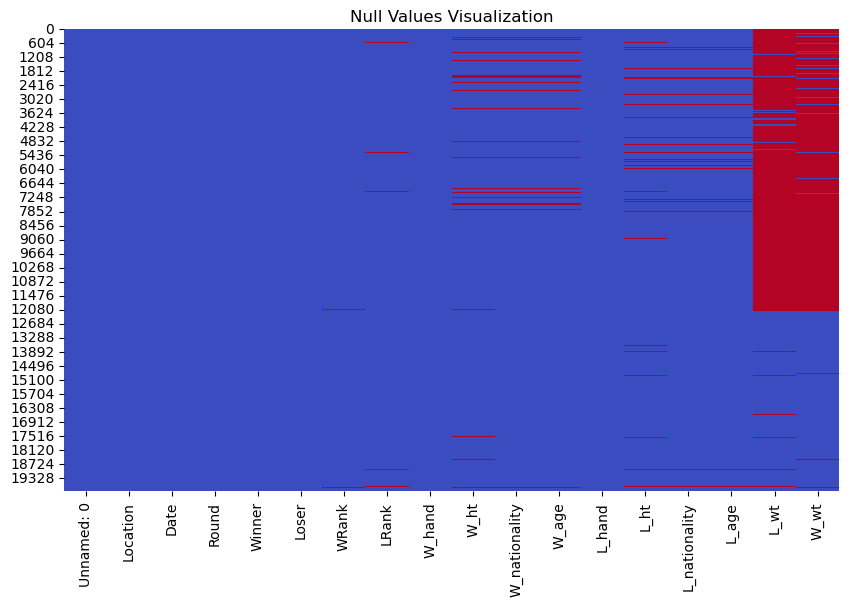

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Null Values Visualization')
plt.show()

In [55]:
df.drop(columns=['L_wt', 'W_wt'], inplace=True)

In [56]:
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Unnamed: 0          0
Location            0
Date                0
Round               0
Winner              0
Loser               0
WRank              60
LRank             206
W_hand              0
W_ht              957
W_nationality     858
W_age             859
L_hand              0
L_ht             1102
L_nationality     791
L_age             796
dtype: int64


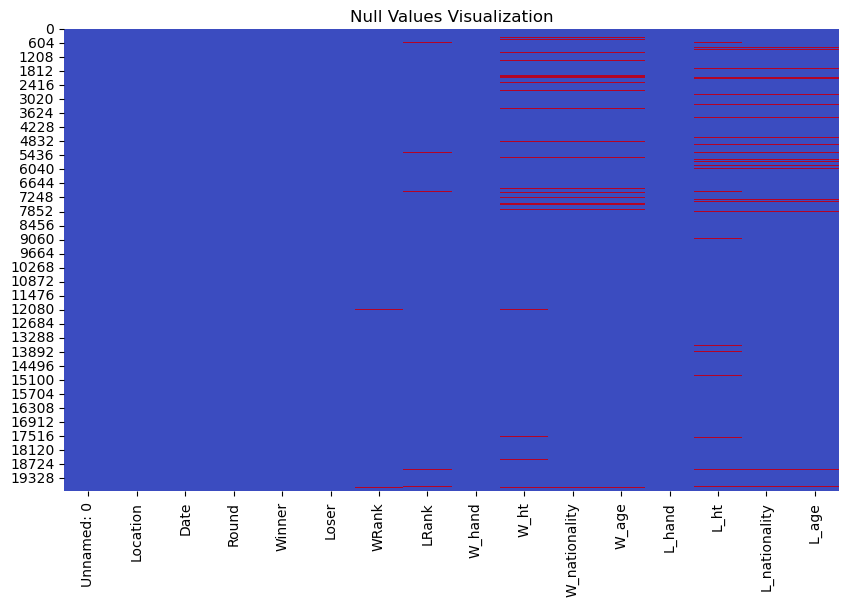

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Null Values Visualization')
plt.show()

In [58]:
df['WRank'].fillna(-1, inplace=True)  # Replace with -1 or another value indicating unknown rank
df['LRank'].fillna(-1, inplace=True)  # Replace with -1 or another value indicating unknown rank
df['W_nationality'].fillna('Unknown', inplace=True)  # Replace with 'Unknown' or another category indicating unknown nationality
df['L_nationality'].fillna('Unknown', inplace=True)  # Replace with 'Unknown' or another category indicating unknown nationality

In [59]:
columns_with_missing_values = ['W_ht', 'L_ht']

for col in columns_with_missing_values:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

In [60]:
median_age = df['W_age'].median()
df['W_age'].fillna(median_age, inplace=True)
unique_values = df['W_age'].unique()
unique_values

array([24.6, 37.3, 36.7, 24.1, 27.6, 22.3, 37. , 24.8, 32.9, 26.3, 31.5,
       32.6, 29. , 33.7, 25.3, 28. , 34.8, 39. , 22.8, 26.7, 22.6, 27.9,
       29.5, 31.6, 29.6, 32. , 42. , 36. , 34.5, 25.4, 28.1, 46. , 35.1,
       35.2, 34. , 39.8, 33.2, 29.1, 31.7, 34.9, 37.4, 35. , 26.6, 29.7,
       33.6, 31.8, 26.9, 33. , 28.6, 37.1, 41. , 32.8, 31.2, 21.1, 30.2,
       28.5, 23.9, 21.7, 23.6, 23.2, 20.9, 31. , 32.3, 32.4, 31.3, 34.7,
       31.1, 40. , 29.4, 26.8, 29.3, 28.3, 27.4, 24.7, 21.3, 27.3, 22.1,
       28.9, 43. , 33.1, 20.1, 30.6, 28.2, 25.6, 44. , 23.5, 27. , 25.9,
       25.5, 28.7, 24.3, 26. , 19.7, 22. , 23.3, 34.2, 32.1, 30. , 30.3,
       38. , 26.2, 29.9, 30.5, 22.7, 29.2, 26.4, 20.4, 25.8, 23.7, 22.4,
       20. , 27.5, 20.7, 19. , 21.6, 18.5, 28.8, 25.1, 20.5, 21.9, 19.4,
       19.3, 23.8, 25. , 17.6, 20.6, 22.5, 21.4, 22.2, 18.8, 19.6, 19.8,
       30.7, 27.7, 35.5, 21.2, 33.3, 22.9, 27.8, 19.9, 31.9, 33.8, 30.4,
       24.9, 30.8, 29.8, 36.8, 35.6, 23. , 33.4, 35

In [61]:
median_age = df['L_age'].median()
df['L_age'].fillna(median_age, inplace=True)
unique_values = df['L_age'].unique()
unique_values


array([22.8, 39.6, 26.2, 23.1, 29. , 41. , 31.1, 34. , 23.2, 31.2, 22.3,
       36.7, 24.8, 32.9, 37. , 26.3, 31.3, 23.9, 24.6, 25.3, 32.6, 33.7,
       28. , 30.8, 26.6, 24.5, 22.1, 20.1, 29.1, 39. , 24.1, 28.5, 34.8,
       30.2, 22.6, 27.9, 32. , 29.4, 26.4, 36. , 42. , 34.4, 29.6, 28.9,
       31.7, 33.6, 28.4, 34.9, 31.8, 28.6, 35.2, 25.4, 34.5, 39.8, 46. ,
       35.1, 33.2, 31.6, 32.2, 20.9, 30.5, 38. , 35. , 37.3, 29.7, 30. ,
       26.8, 33. , 32.7, 22.5, 26.9, 28.2, 43. , 25.9, 21.3, 31. , 30.6,
       21.1, 27. , 21.7, 22.9, 23.6, 32.8, 32.3, 27.6, 25. , 27.4, 29.3,
       40. , 21.2, 25.5, 23.5, 23.3, 31.5, 37.2, 20.4, 25.2, 22. , 19.7,
       33.8, 37.4, 26. , 26.7, 20.5, 21.5, 28.1, 44. , 30.7, 27.5, 22.7,
       20.8, 30.4, 29.5, 30.3, 24.3, 21.8, 23. , 28.3, 18.2, 22.4, 25.1,
       29.2, 19.2, 18.9, 25.8, 21.9, 24.9, 19.4, 24.4, 25.6, 19.8, 21.6,
       23.7, 17.7, 23.8, 24. , 19.3, 34.2, 26.5, 20.6, 32.1, 28.7, 20. ,
       18.8, 17.2, 17.6, 19.6, 21. , 31.4, 19.5, 21

In [62]:
df.head()

,Unnamed: 0,Location,Date,Round,Winner,Loser,WRank,LRank,W_hand,W_ht,W_nationality,W_age,L_hand,L_ht,L_nationality,L_age
0,0,Brisbane,01/01/2017,Round of 128,Thompson J.,Ymer E.,79.0,160.0,R,183.0,AUS,24.6,R,183.0,SWE,22.8
1,1,Brisbane,01/02/2017,Round of 128,Mahut N.,Robert S.,39.0,54.0,R,190.0,FRA,37.3,R,185.0,FRA,39.6
2,2,Brisbane,01/02/2017,Round of 128,Ferrer D.,Tomic B.,21.0,26.0,R,175.0,ESP,36.7,R,193.0,AUS,26.2
3,3,Brisbane,01/02/2017,Round of 128,Edmund K.,Escobedo E.,45.0,141.0,R,188.0,GBR,24.1,R,185.0,MEX,23.1
4,4,Brisbane,01/02/2017,Round of 128,Dimitrov G.,Johnson S.,17.0,33.0,R,188.0,BUL,27.6,R,188.0,USA,29.0


In [63]:
df.columns

Index(['Unnamed: 0', 'Location', 'Date', 'Round', 'Winner', 'Loser', 'WRank',
       'LRank', 'W_hand', 'W_ht', 'W_nationality', 'W_age', 'L_hand', 'L_ht',
       'L_nationality', 'L_age'],
      dtype='object')

In [64]:
def detect_outliers(df, column, threshold=4):
    """
    Detect outliers in a dataframe column using the IQR method.


    Returns:
        list: A list containing the indices of the outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    return outliers


numeric_columns = ['W_ht', 'W_age', 'L_ht', 'L_age', 'WRank', 'LRank']
outliers = {}
outliers_count={}
for column in numeric_columns:
    outliers[column] = detect_outliers(df, column)
    outliers_count[column] = len(outliers[column])


# Print out indices of outliers for each column
for column, indices in outliers.items():
    print(f"Outliers in column '{column}': {indices}, Count: {outliers_count[column]}")



Outliers in column 'W_ht': [], Count: 0
Outliers in column 'W_age': [], Count: 0
Outliers in column 'L_ht': [], Count: 0
Outliers in column 'L_age': [], Count: 0
Outliers in column 'WRank': [3130, 10601, 12064, 12088, 12099, 12107, 12112, 12114, 12177, 12186, 12554, 17719, 18528, 18579], Count: 14
Outliers in column 'LRank': [63, 2033, 2691, 2928, 2957, 3102, 3146, 4756, 7335, 7713, 9940, 10327, 12052, 12053, 12077, 12079, 12089, 12090, 12098, 12100, 12112, 12113, 12168, 12247, 12268, 12307, 12346, 12517, 12864, 12898, 12991, 13030, 13410, 13549, 13588, 13589, 13707, 13894, 14760, 14836, 14892, 14962, 14974, 15111, 15115, 15250, 15251, 15471, 15481, 15522, 15525, 15563, 15607, 15641, 15804, 15840, 16196, 16211, 16289, 16641, 16682, 16964, 17264, 17273, 17349, 17352, 17487, 17715, 18318, 18637, 18663, 18715, 18973, 18976, 18980, 19053, 19193, 19278, 19355, 19456, 19673], Count: 81


In [65]:
#Removing outliers
for column, indices in outliers.items():
    for index in indices:
        if index in df.index:
            df = df.drop(index)

In [66]:
duplicate_rows = df[df.duplicated()]

# Display duplicate rows, if any
if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


Normalize the data.

In [67]:
# Normalize the data using Z-score normalization and min-max scaling
numeric_columns = ['W_ht', 'W_age', 'L_ht', 'L_age', 'WRank', 'LRank']

# Apply Z-score, min-max and decimal scaling normalization to the numeric columns

for column in numeric_columns:
    # Z-score normalization
    df[f'{column}_zscore'] = (df[column] - df[column].mean()) / df[column].std()
    # Min-max scaling
    df[f'{column}_minmax'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    # Decimal scaling
    max_length = max(df[column].apply(lambda x: len(str(np.floor(x))) if x > 0 else 1))
    df[f'{column}_decimal'] = df[column] / (10**max_length)


# Display the normalized columns
df.head()

    # 1. For negative Z-score indeed indicates a value below the mean, which for tennis rankings, translates to a better ranking because the best players have lower ranking numbers.
    # 2. After min-max scaling, the player with the best rank (lowest original ranking number) will have a normalized value closer to 0, and the player with the worst rank (highest original ranking number) will have a normalized value closer to 1.
    # 3. For tennis rankings, a lower decimal scaled value  indicates a better rank



,Unnamed: 0,Location,Date,Round,Winner,Loser,WRank,LRank,W_hand,W_ht,...,L_ht_decimal,L_age_zscore,L_age_minmax,L_age_decimal,WRank_zscore,WRank_minmax,WRank_decimal,LRank_zscore,LRank_minmax,LRank_decimal
0,0,Brisbane,01/01/2017,Round of 128,Thompson J.,Ymer E.,79.0,160.0,R,183.0,...,0.00183,-1.424651,0.231707,0.00228,-0.471384,0.073394,0.000079,-0.165106,0.133350,0.000160
1,1,Brisbane,01/02/2017,Round of 128,Mahut N.,Robert S.,39.0,54.0,R,190.0,...,0.00185,1.460944,0.743902,0.00396,-0.706621,0.036697,0.000039,-0.712957,0.045554,0.000054
2,2,Brisbane,01/02/2017,Round of 128,Ferrer D.,Tomic B.,21.0,26.0,R,175.0,...,0.00193,-0.840662,0.335366,0.00262,-0.812477,0.020183,0.000021,-0.857673,0.022363,0.000026
3,3,Brisbane,01/02/2017,Round of 128,Edmund K.,Escobedo E.,45.0,141.0,R,188.0,...,0.00185,-1.373123,0.240854,0.00231,-0.671335,0.042202,0.000045,-0.263306,0.117613,0.000141
4,4,Brisbane,01/02/2017,Round of 128,Dimitrov G.,Johnson S.,17.0,33.0,R,188.0,...,0.00188,-0.359729,0.420732,0.00290,-0.836001,0.016514,0.000017,-0.821494,0.028161,0.000033


In [68]:
# print unique vlaues of round column
unique_values = df['Round'].unique()

# Encode the Round column using ordinal encoding
round_mapping = {
    '1st Round Qualifying': 1,
    '2nd Round Qualifying': 2,
    '3rd Round Qualifying': 3,
    'Round Robin': 4,
    'Round of 128': 5,
    'Round of 64': 6,
    'Round of 32': 7,
    'Round of 16': 8,
    'Quarterfinals': 9,
    'Semifinals': 10,
    'Olympic Bronze': 11,
    'The Final': 12
}

df['Round'] = df['Round'].map(round_mapping)
df1 = df.copy
# Encode the 'W_hand' and 'L_hand' columns using one-hot encoding
# Applying one-hot encoding and dropping the original columns
df1 = pd.get_dummies(df1, columns=['W_hand', 'L_hand'])
# df = pd.concat([df.drop(['W_hand', 'L_hand'], axis=1), pd.get_dummies(df[['W_hand', 'L_hand']])], axis=1)








In [69]:
df.head()

,Unnamed: 0,Location,Date,Round,Winner,Loser,WRank,LRank,W_hand,W_ht,...,L_ht_decimal,L_age_zscore,L_age_minmax,L_age_decimal,WRank_zscore,WRank_minmax,WRank_decimal,LRank_zscore,LRank_minmax,LRank_decimal
0,0,Brisbane,01/01/2017,5,Thompson J.,Ymer E.,79.0,160.0,R,183.0,...,0.00183,-1.424651,0.231707,0.00228,-0.471384,0.073394,0.000079,-0.165106,0.133350,0.000160
1,1,Brisbane,01/02/2017,5,Mahut N.,Robert S.,39.0,54.0,R,190.0,...,0.00185,1.460944,0.743902,0.00396,-0.706621,0.036697,0.000039,-0.712957,0.045554,0.000054
2,2,Brisbane,01/02/2017,5,Ferrer D.,Tomic B.,21.0,26.0,R,175.0,...,0.00193,-0.840662,0.335366,0.00262,-0.812477,0.020183,0.000021,-0.857673,0.022363,0.000026
3,3,Brisbane,01/02/2017,5,Edmund K.,Escobedo E.,45.0,141.0,R,188.0,...,0.00185,-1.373123,0.240854,0.00231,-0.671335,0.042202,0.000045,-0.263306,0.117613,0.000141
4,4,Brisbane,01/02/2017,5,Dimitrov G.,Johnson S.,17.0,33.0,R,188.0,...,0.00188,-0.359729,0.420732,0.00290,-0.836001,0.016514,0.000017,-0.821494,0.028161,0.000033


In [70]:
df.columns

Index(['Unnamed: 0', 'Location', 'Date', 'Round', 'Winner', 'Loser', 'WRank',
       'LRank', 'W_hand', 'W_ht', 'W_nationality', 'W_age', 'L_hand', 'L_ht',
       'L_nationality', 'L_age', 'W_ht_zscore', 'W_ht_minmax', 'W_ht_decimal',
       'W_age_zscore', 'W_age_minmax', 'W_age_decimal', 'L_ht_zscore',
       'L_ht_minmax', 'L_ht_decimal', 'L_age_zscore', 'L_age_minmax',
       'L_age_decimal', 'WRank_zscore', 'WRank_minmax', 'WRank_decimal',
       'LRank_zscore', 'LRank_minmax', 'LRank_decimal'],
      dtype='object')

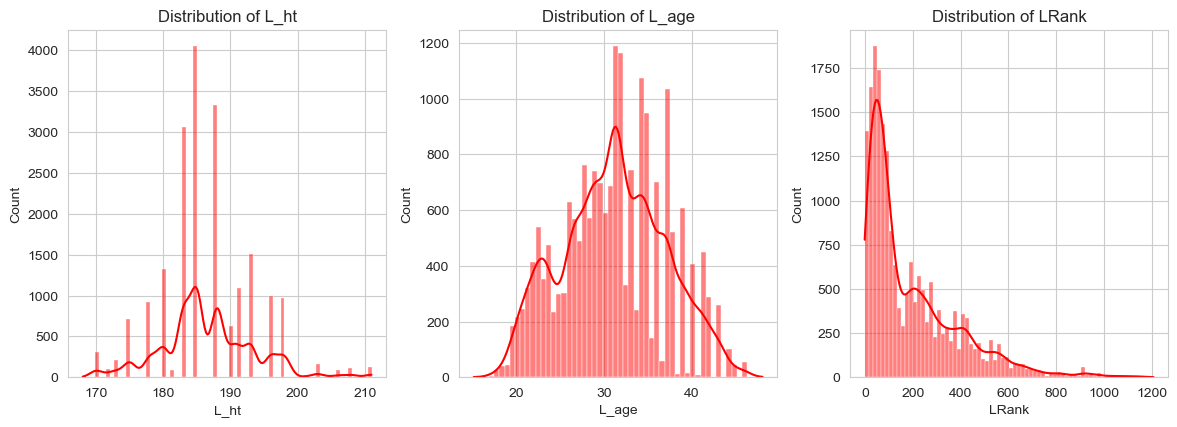

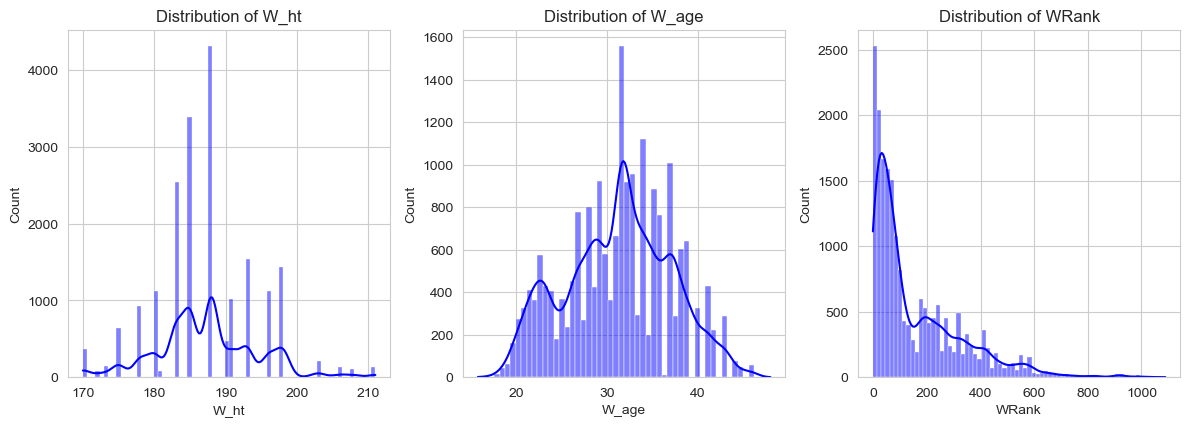

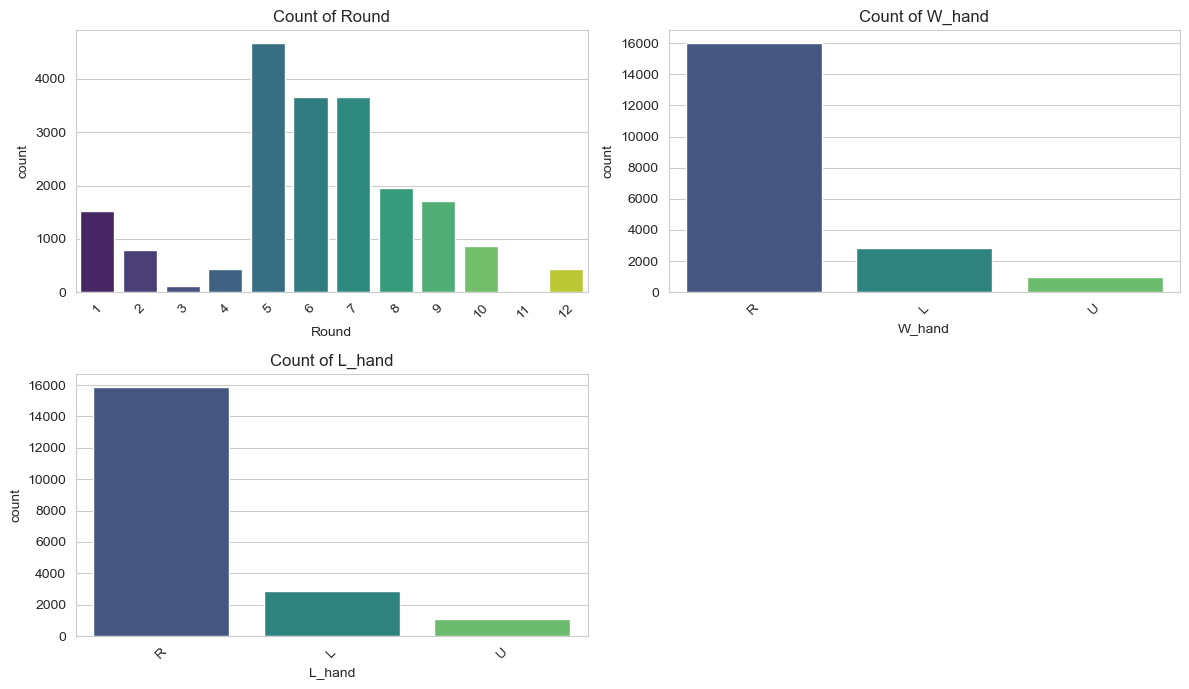

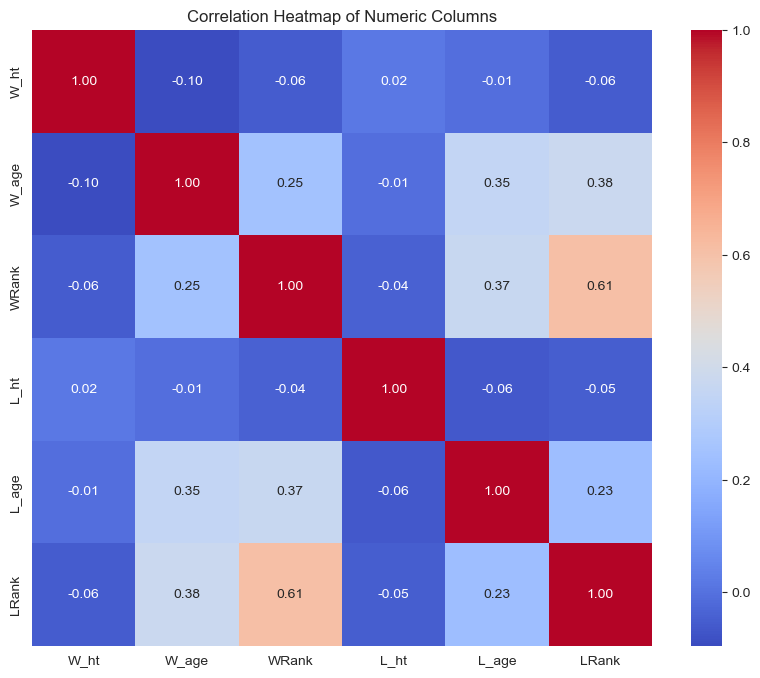

---------------------------------------------------------------------------
UnboundLocalError                         Traceback (most recent call last)
/var/folders/3y/75x8knq12vvb0g4tprwmzvj40000gn/T/ipykernel_67466/3190820926.py in update_graph(
    selected_feature='match_outcome_distribution'
)
     63     #     surface_counts = df['Surface'].value_counts()
     64     #     fig = px.bar(x=surface_counts.index, y=surface_counts.values, labels={'x': 'Surface', 'y': 'Number of Matches'}, title='Surface Preference')
---> 65     return fig
        fig = undefined
     66 
     67 # Run the app

UnboundLocalError: local variable 'fig' referenced before assignment



In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot histograms of numeric columns
numeric_columns = ['L_ht', 'L_age', 'LRank']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, color='red')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

numeric_columns = ['W_ht', 'W_age', 'WRank']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


# Countplot for categorical columns
categorical_columns = ['Round', 'W_hand', 'L_hand']
plt.figure(figsize=(12, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
numeric_columns = ['W_ht', 'W_age', 'WRank', 'L_ht', 'L_age', 'LRank']
# Heatmap to visualize correlation between numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


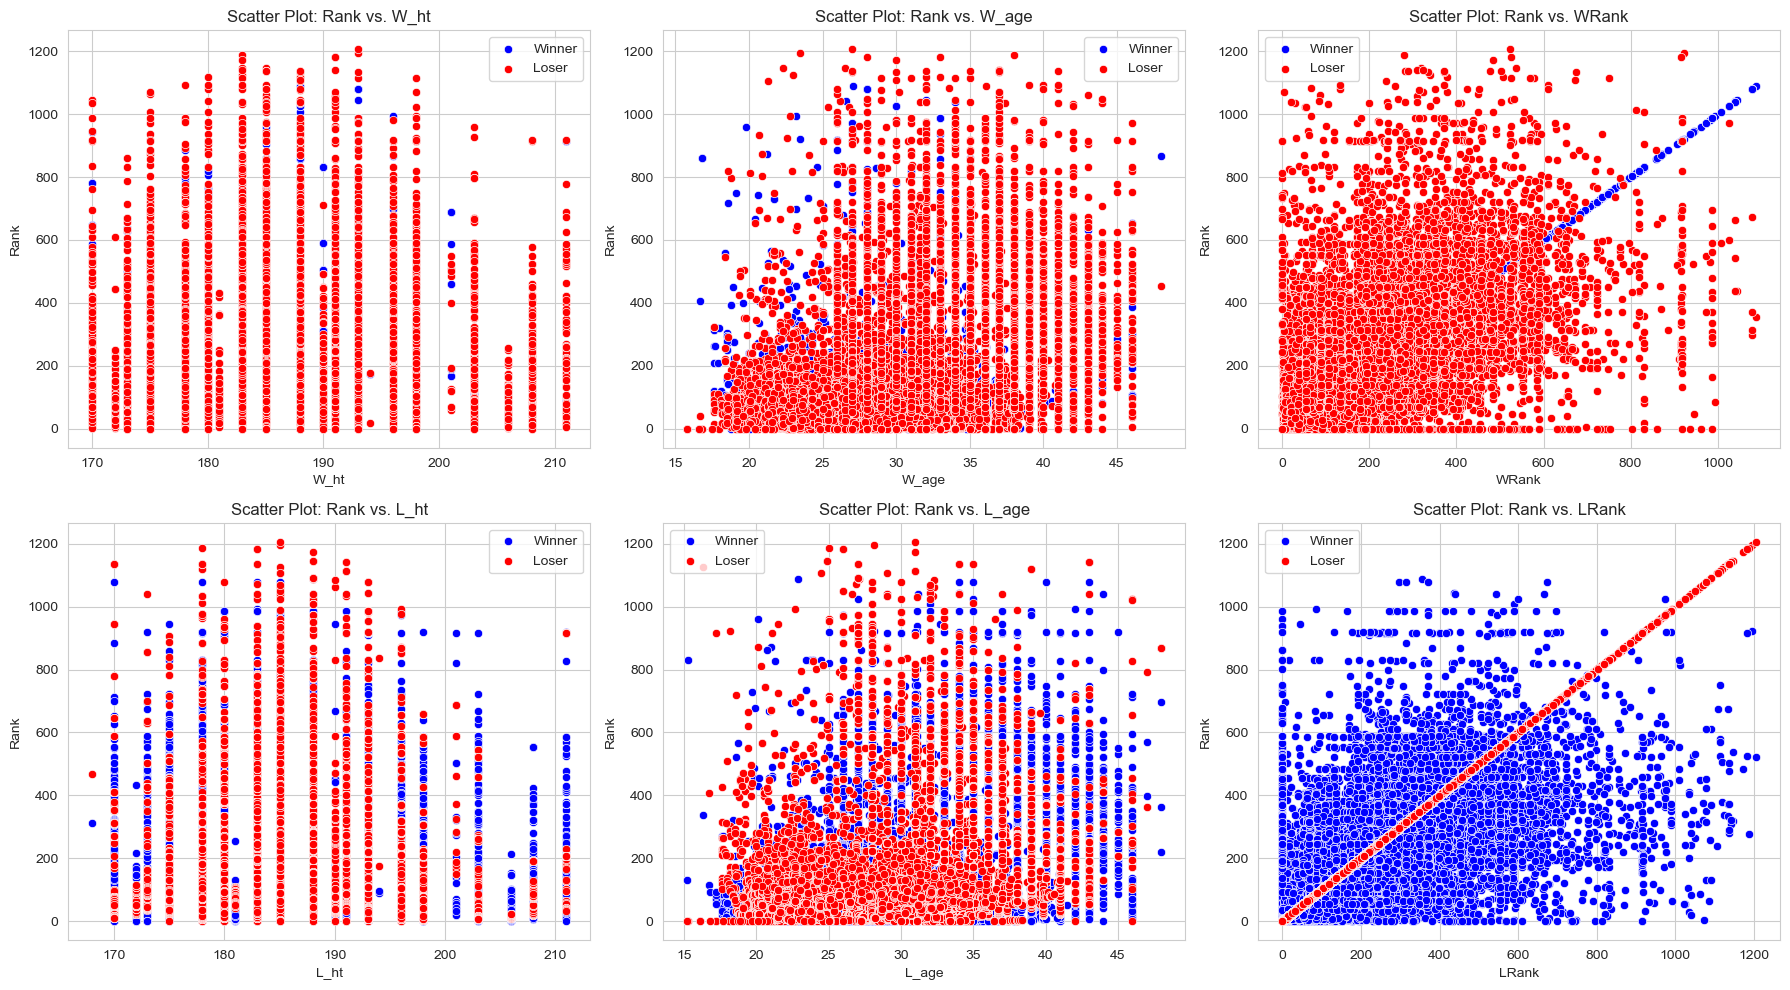

In [78]:
plt.figure(figsize=(18, 10))  # Adjust the figure size as needed
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=column, y='WRank', data=df, color='blue', label='Winner')
    sns.scatterplot(x=column, y='LRank', data=df, color='red', label='Loser')
    plt.title(f'Scatter Plot: Rank vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Rank')
    plt.legend()  # Add legend to differentiate between winners and losers
plt.tight_layout()
plt.show()


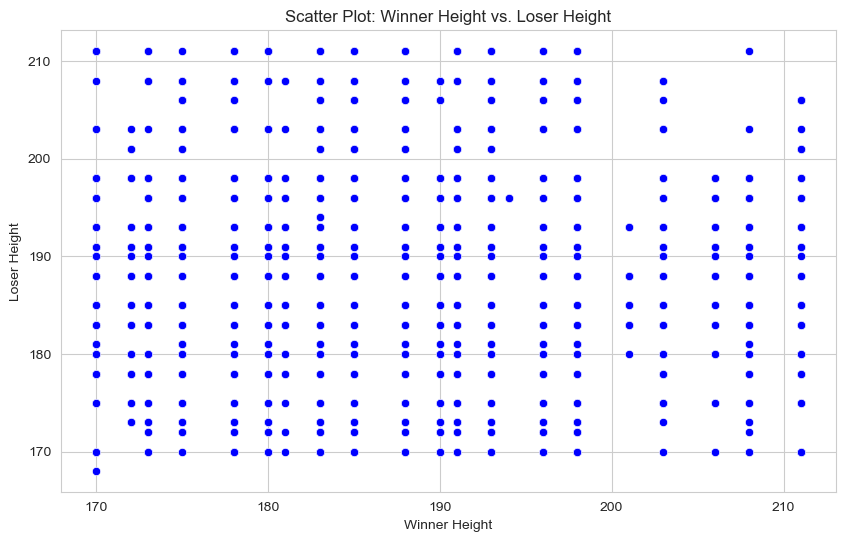

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='W_ht', y='L_ht', data=df, color='blue')
plt.title('Scatter Plot: Winner Height vs. Loser Height')
plt.xlabel('Winner Height')
plt.ylabel('Loser Height')
plt.show()

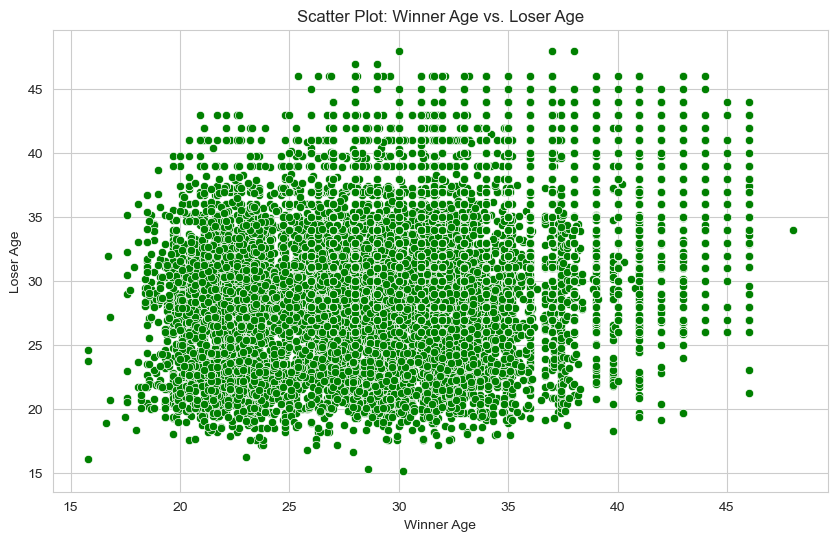

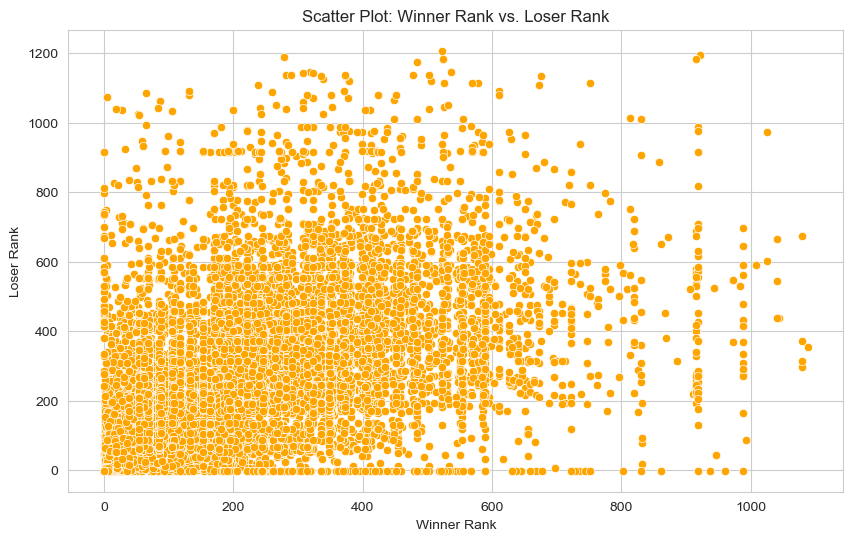

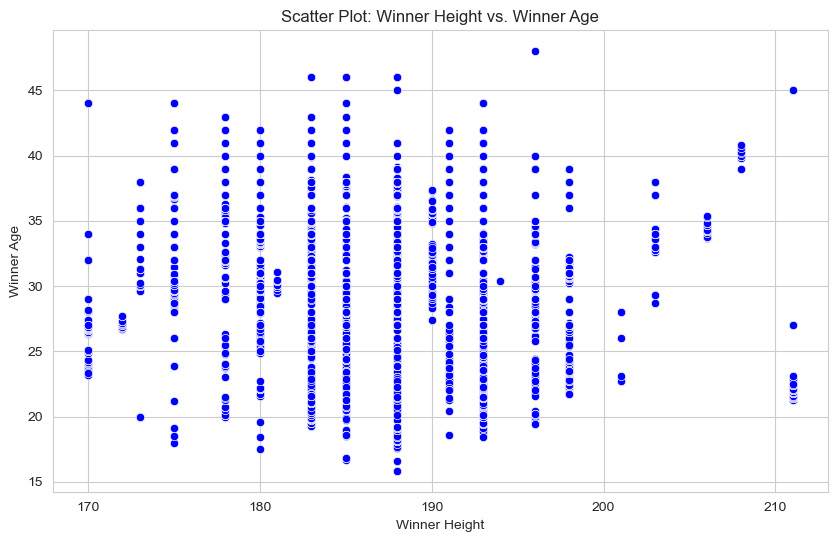

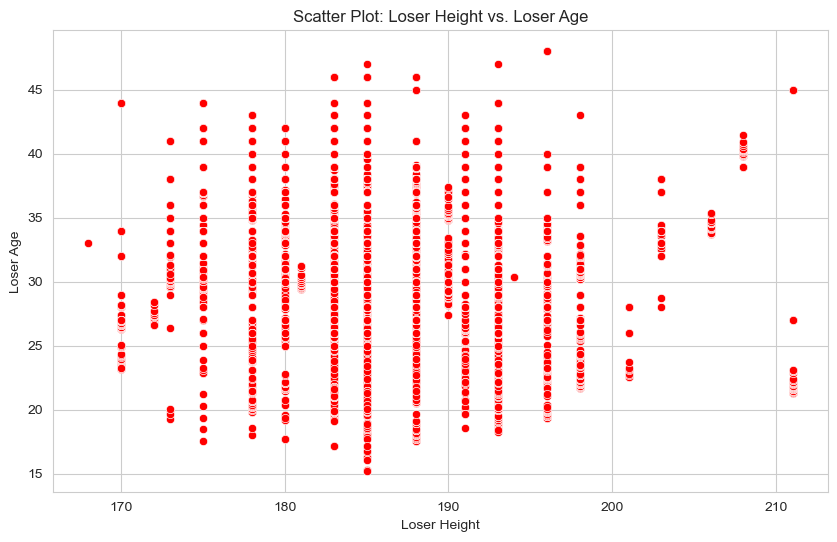

In [73]:
# Scatter plot: Winner Age vs. Loser Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='W_age', y='L_age', data=df, color='green')
plt.title('Scatter Plot: Winner Age vs. Loser Age')
plt.xlabel('Winner Age')
plt.ylabel('Loser Age')
plt.show()

# Scatter plot: Winner Rank vs. Loser Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WRank', y='LRank', data=df, color='orange')
plt.title('Scatter Plot: Winner Rank vs. Loser Rank')
plt.xlabel('Winner Rank')
plt.ylabel('Loser Rank')
plt.show()

# Scatter plot: Winner Height vs. Winner Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='W_ht', y='W_age', data=df, color='blue')
plt.title('Scatter Plot: Winner Height vs. Winner Age')
plt.xlabel('Winner Height')
plt.ylabel('Winner Age')
plt.show()

# Scatter plot: Loser Height vs. Loser Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='L_ht', y='L_age', data=df, color='red')
plt.title('Scatter Plot: Loser Height vs. Loser Age')
plt.xlabel('Loser Height')
plt.ylabel('Loser Age')
plt.show()


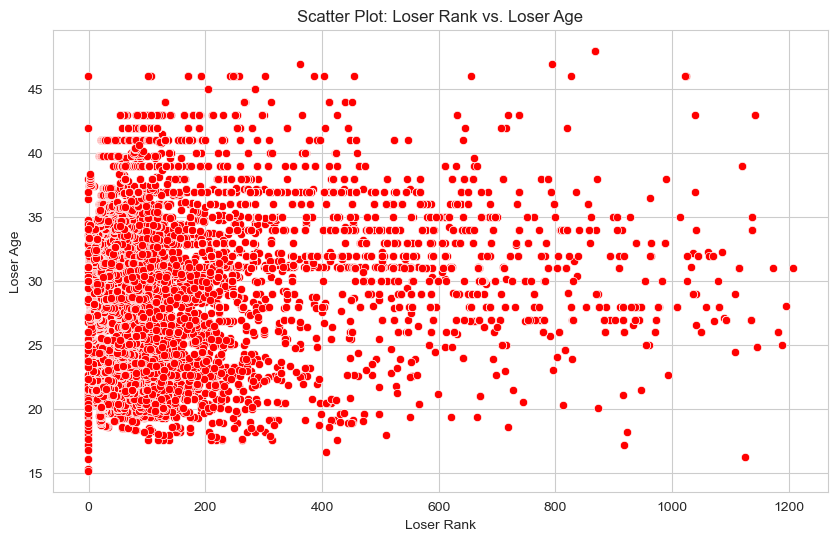

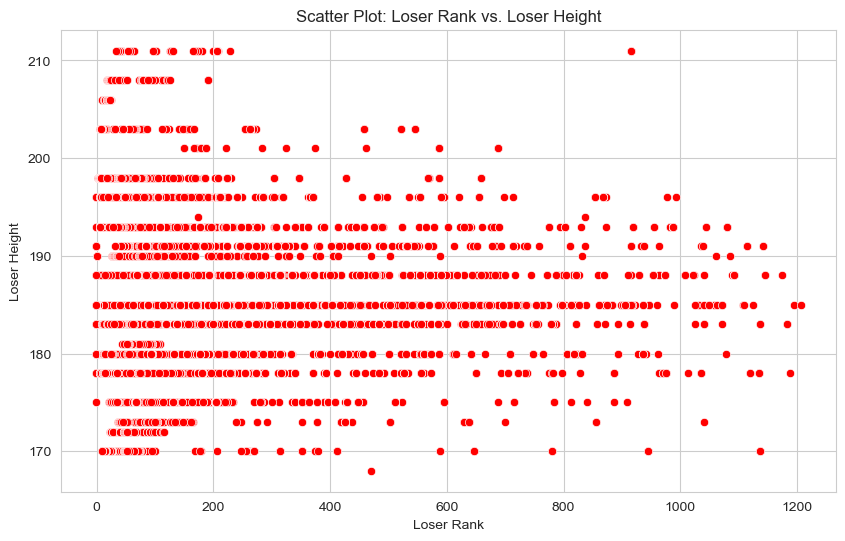

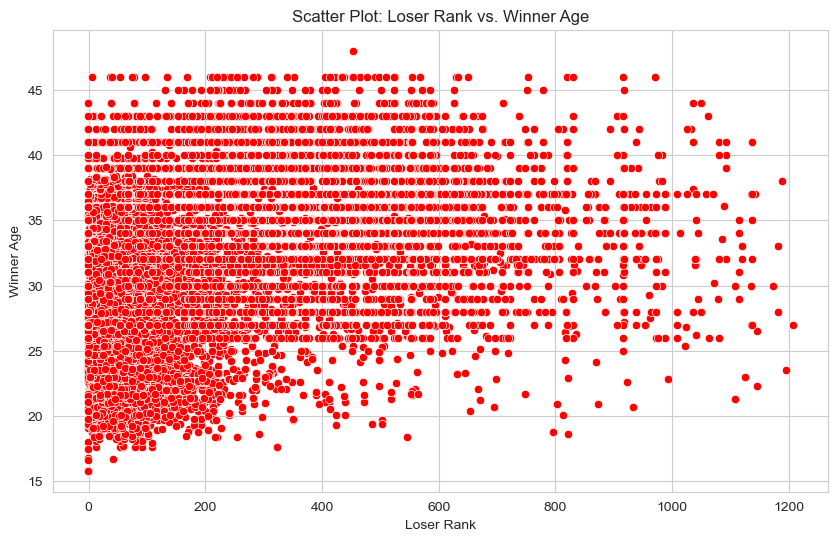

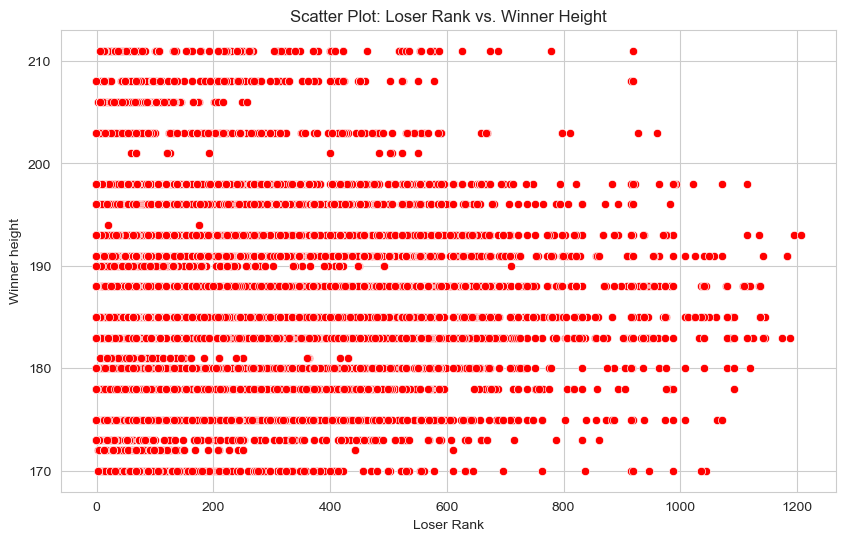

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LRank', y='L_age', data=df, color='red')
plt.title('Scatter Plot: Loser Rank vs. Loser Age')
plt.xlabel('Loser Rank')
plt.ylabel('Loser Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LRank', y='L_ht', data=df, color='red')
plt.title('Scatter Plot: Loser Rank vs. Loser Height')
plt.xlabel('Loser Rank')
plt.ylabel('Loser Height')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LRank', y='W_age', data=df, color='red')
plt.title('Scatter Plot: Loser Rank vs. Winner Age')
plt.xlabel('Loser Rank')
plt.ylabel('Winner Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LRank', y='W_ht', data=df, color='red')
plt.title('Scatter Plot: Loser Rank vs. Winner Height')
plt.xlabel('Loser Rank')
plt.ylabel('Winner height')
plt.show()

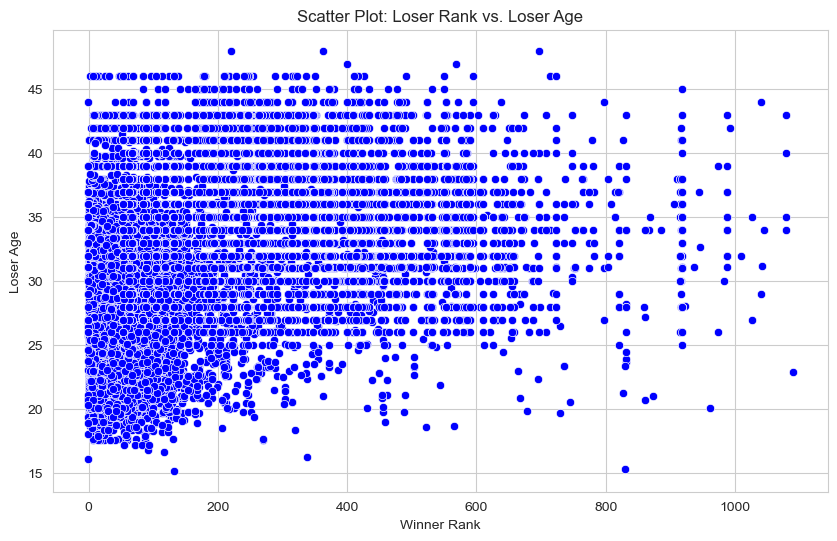

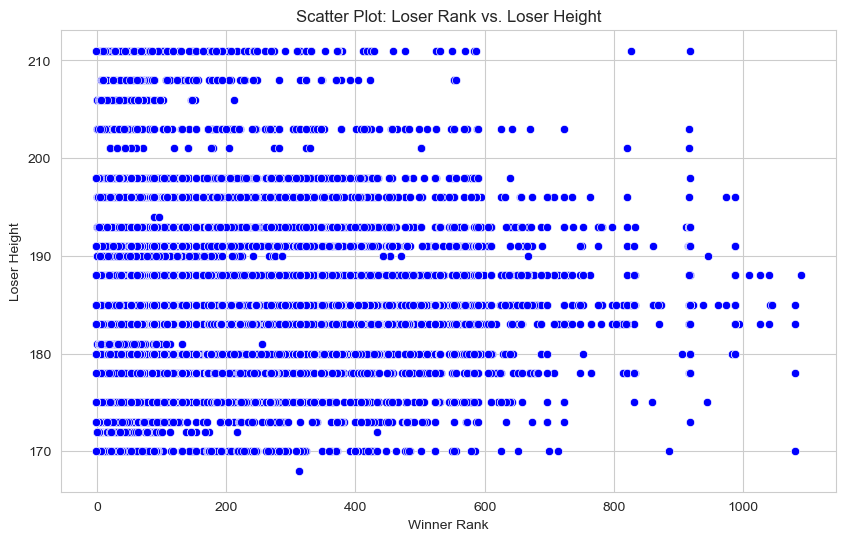

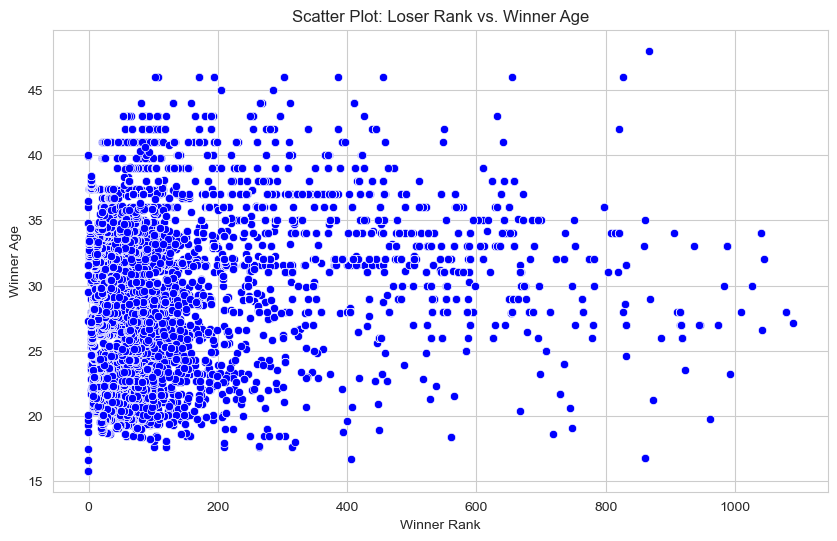

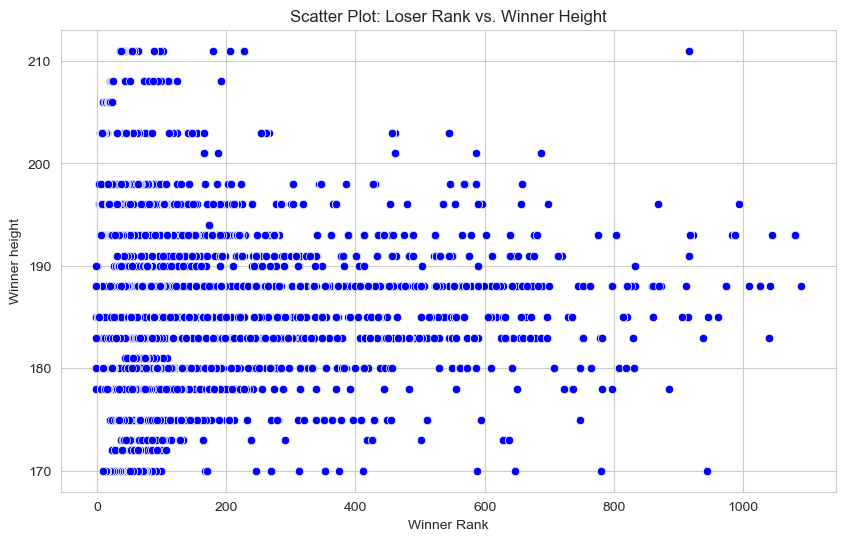

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WRank', y='L_age', data=df, color='blue')
plt.title('Scatter Plot: Loser Rank vs. Loser Age')
plt.xlabel('Winner Rank')
plt.ylabel('Loser Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='WRank', y='L_ht', data=df, color='blue')
plt.title('Scatter Plot: Loser Rank vs. Loser Height')
plt.xlabel('Winner Rank')
plt.ylabel('Loser Height')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='WRank', y='W_age', data=df, color='blue')
plt.title('Scatter Plot: Loser Rank vs. Winner Age')
plt.xlabel('Winner Rank')
plt.ylabel('Winner Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='WRank', y='W_ht', data=df, color='blue')
plt.title('Scatter Plot: Loser Rank vs. Winner Height')
plt.xlabel('Winner Rank')
plt.ylabel('Winner height')
plt.show()

In [74]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

/var/folders/3y/75x8knq12vvb0g4tprwmzvj40000gn/T/ipykernel_67466/1143902427.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/3y/75x8knq12vvb0g4tprwmzvj40000gn/T/ipykernel_67466/1143902427.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [75]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Tennis Match Explorer"),
    html.Label("Select a feature to visualize:"),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': 'Winners Age Distribution', 'value': 'winners_age_distribution'},
            {'label': 'Losers Rank Distribution', 'value': 'losers_rank_distribution'},
            {'label': 'Winners Rank Distribution', 'value': 'winners_rank_distribution'},
            {'label': 'Losers Rank Distribution', 'value': 'losers_rank_distribution'},
            {'label': 'Scatter Plot: Winner Height vs. Loser Height', 'value': 'scatter_winner_height_vs_loser_height'},
            {'label': 'Scatter Plot: Winner Age vs. Loser Age', 'value': 'scatter_winner_age_vs_loser_age'},
            {'label': 'Scatter Plot: Winner Rank vs. Loser Rank', 'value': 'scatter_winner_rank_vs_loser_rank'},
            {'label': 'Scatter Plot: Winner Height vs. Winner Age', 'value': 'scatter_winner_height_vs_winner_age'},
            {'label': 'Scatter Plot: Loser Height vs. Loser Age', 'value': 'scatter_loser_height_vs_loser_age'}

            # {'label': 'Match Outcome Distribution', 'value': 'match_outcome_distribution'},
            # {'label': 'Surface Preference', 'value': 'surface_preference'},
        ],
        value='match_outcome_distribution'
    ),
    dcc.Graph(id='visualizations')
])

# Define callback to update the graph based on selected feature
@app.callback(
    dash.dependencies.Output('visualizations', 'figure'),
    [dash.dependencies.Input('feature-dropdown', 'value')]
    )

def update_graph(selected_feature):
    if selected_feature == 'winners_age_distribution':
        fig = px.histogram(df, x='W_age', nbins=20, title='Winners Age Distribution')
        fig.update_traces(opacity=0.75)
    elif selected_feature == 'losers_age_distribution':
        fig = px.histogram(df, x='L_age', nbins=20, title='Losers Age Distribution')
        fig.update_traces(opacity=0.75)
    elif selected_feature == 'winners_rank_distribution':
        fig = px.histogram(df, x='WRank', nbins=50, title='Winners Rank Distribution')
        fig.update_traces(opacity=0.75)
    elif selected_feature == 'losers_rank_distribution':
        fig = px.histogram(df, x='LRank', nbins=50, title='Losers Rank Distribution')
        fig.update_traces(opacity=0.75)
    elif selected_feature == 'scatter_winner_height_vs_loser_height':
        fig = px.scatter(df, x='W_ht', y='L_ht', title='Scatter Plot: Winner Height vs. Loser Height')
    elif selected_feature == 'scatter_winner_age_vs_loser_age':
        fig = px.scatter(df, x='W_age', y='L_age', title='Scatter Plot: Winner Age vs. Loser Age')
    elif selected_feature == 'scatter_winner_rank_vs_loser_rank':
        fig = px.scatter(df, x='WRank', y='LRank', title='Scatter Plot: Winner Rank vs. Loser Rank')
    elif selected_feature == 'scatter_winner_height_vs_winner_age':
        fig = px.scatter(df, x='W_ht', y='W_age', title='Scatter Plot: Winner Height vs. Winner Age')
    elif selected_feature == 'scatter_loser_height_vs_loser_age':
        fig = px.scatter(df, x='L_ht', y='L_age', title='Scatter Plot: Loser Height vs. Loser Age')
    # Add more elif blocks for additional features
    # elif selected_feature == 'match_outcome_distribution':
    #     outcome_counts = pd.concat([df['Winner'], df['Loser']]).value_counts()
    #     fig = px.pie(names=outcome_counts.index, values=outcome_counts.values, title='Match Outcome Distribution')
    # elif selected_feature == 'surface_preference':
    #     surface_counts = df['Surface'].value_counts()
    #     fig = px.bar(x=surface_counts.index, y=surface_counts.values, labels={'x': 'Surface', 'y': 'Number of Matches'}, title='Surface Preference')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)